<a href="https://colab.research.google.com/github/raquelgosalbezsirvent/Conversor-XML-JSON/blob/main/Practica_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación del paquetes

In [3]:
pip install ucimlrepo

In [4]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.7/395.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=abda0f8dfa254babbe6cc3b0f02d198893cb3952a21a523fae95078361bf51e5
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


# Importación de librerías

In [21]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, anderson, chi2_contingency, spearmanr, kruskal, mannwhitneyu
from sklearn.feature_selection import mutual_info_classif
from matplotlib.colors import to_rgba
import matplotlib.patches as mpatches
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier

# Dataset

In [6]:
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
Y = cdc_diabetes_health_indicators.data.targets
data = pd.concat([X, Y], axis=1)

data.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
0        15         1    0    9          4       3                0  
1         0         0    0    7          6       1                0  
2        30         1    0    9          4       8                0  
3         0         0    0   11          3       6                0  
4         0         0    0   11          5       4                0  

[5 rows x 22 columns]

In [7]:
# metadata
#print(cdc_diabetes_health_indicators.metadata)

# informacion de variables
variables_df = pd.DataFrame(cdc_diabetes_health_indicators.variables)
pd.set_option("display.max_colwidth", None)
display(variables_df[['name', 'description']].style.set_properties(**{'text-align': 'left'}))

# variables
numerical_columns = ['BMI', 'MentHlth', 'PhysHlth']
categorical_columns = X.drop(columns=numerical_columns).columns.tolist()
categorical_nonbinary_columns = ['GenHlth','Age', 'Education', 'Income']
categorical_binary_columns = [col for col in categorical_columns if col not in categorical_nonbinary_columns]

print("numerical_columns:", numerical_columns)
print("categorical_columns:", categorical_columns)
print("categorical_nonbinary_columns:", categorical_binary_columns)
print("categorical_binary_columns:", categorical_nonbinary_columns)

numerical_columns: ['BMI', 'MentHlth', 'PhysHlth']
categorical_columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
categorical_nonbinary_columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
categorical_binary_columns: ['GenHlth', 'Age', 'Education', 'Income']


# 1. Exploración de los datos

## 1.1. ProfileReport

In [ ]:
report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 22/22 [00:06<00:00,  3.50it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observaciones:
* ninguna de las variables tienen valores faltantes
* en principio son todo numeros (se comprobará más adelante)
* se comprueba que los valores introducido efectivamente son los que se esperaban (no hay valores incorrectos)
* a simple vista no se observan outlayers muy significativos (se comprobará más adelante)
* existen imbalances en los datos en: CholCheck (77.0%), Stroke (75.5%), HeartDiseaseorAttack (55.0%), HvyAlcoholConsump (68.8%), AnyHealthcare (71.8%) y NoDocbcCost (58.3%).
* el Dataset tiene 11369 (4.5%) filas iguales (duplicadas?) => NO van a eliminarse, ya que Machine Learning Repository afirma lo siguiente: "Each row represents a person participating in this study."

## 1.2. Distribución de las características

### Tipo de distribución
Se analiza si las variables numéricas siguen o no una distribución normal.

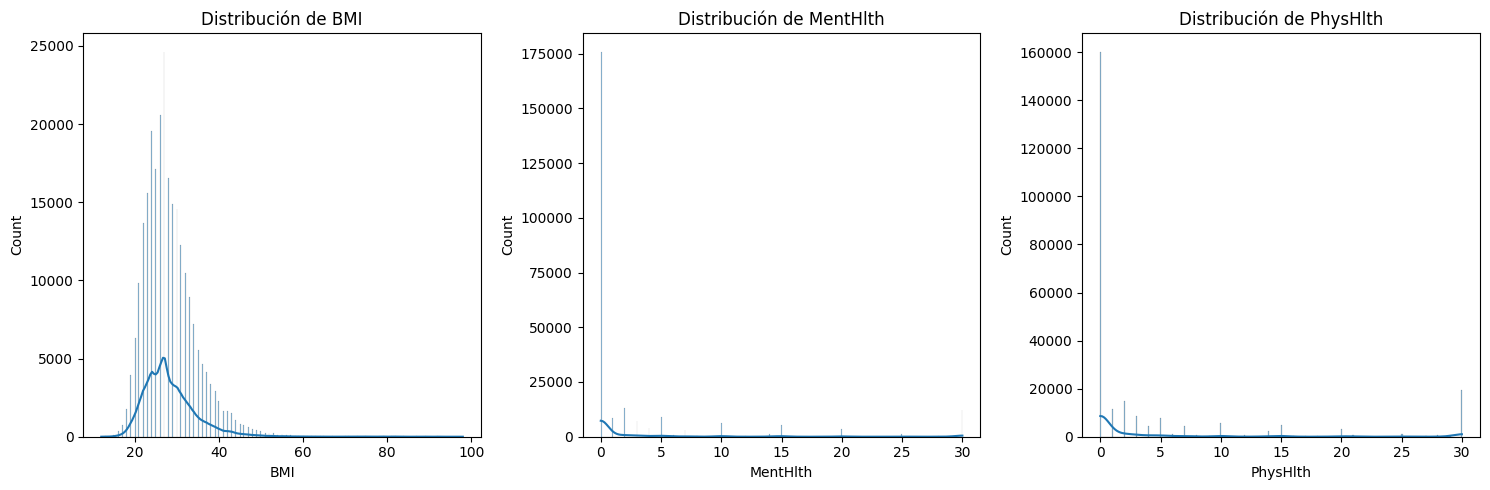


--- Análisis de normalidad para BMI ---
Shapiro-Wilk Test: Estadístico=0.8717, p=0.0000 (Rechaza H0)
D’Agostino’s K^2 Test: Estadístico=126255.7185, p=0.0000 (Rechaza H0)
Anderson-Darling Test:
  Nivel de significancia 15.0% - Valor crítico: 0.5760 (Rechaza H0)
  Nivel de significancia 10.0% - Valor crítico: 0.6560 (Rechaza H0)
  Nivel de significancia 5.0% - Valor crítico: 0.7870 (Rechaza H0)
  Nivel de significancia 2.5% - Valor crítico: 0.9180 (Rechaza H0)
  Nivel de significancia 1.0% - Valor crítico: 1.0920 (Rechaza H0)

--- Análisis de normalidad para MentHlth ---
Shapiro-Wilk Test: Estadístico=0.4869, p=0.0000 (Rechaza H0)
D’Agostino’s K^2 Test: Estadístico=137190.8598, p=0.0000 (Rechaza H0)
Anderson-Darling Test:
  Nivel de significancia 15.0% - Valor crítico: 0.5760 (Rechaza H0)
  Nivel de significancia 10.0% - Valor crítico: 0.6560 (Rechaza H0)
  Nivel de significancia 5.0% - Valor crítico: 0.7870 (Rechaza H0)
  Nivel de significancia 2.5% - Valor crítico: 0.9180 (Rechaza H0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 253680.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Graficar histogramas y KDE plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, var in enumerate(numerical_columns):
    sns.histplot(X[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
plt.tight_layout()
plt.show()

# Pruebas de normalidad
def check_normality(data, var):
    print(f"\n--- Análisis de normalidad para {var} ---")
    stat, p = shapiro(data)
    print(f"Shapiro-Wilk Test: Estadístico={stat:.4f}, p={p:.4f} {'(Rechaza H0)' if p < 0.05 else '(No se rechaza H0)'}")

    stat, p = normaltest(data)
    print(f"D’Agostino’s K^2 Test: Estadístico={stat:.4f}, p={p:.4f} {'(Rechaza H0)' if p < 0.05 else '(No se rechaza H0)'}")

    result = anderson(data)
    print("Anderson-Darling Test:")
    for i in range(len(result.critical_values)):
        sig_level = result.significance_level[i]
        crit_val = result.critical_values[i]
        decision = "(Rechaza H0)" if result.statistic > crit_val else "(No se rechaza H0)"
        print(f"  Nivel de significancia {sig_level}% - Valor crítico: {crit_val:.4f} {decision}")

# Aplicar pruebas a cada variable
for var in numerical_columns:
    check_normality(X[var].dropna(), var)

Se concluye que **ninguna de las características numéricas siguen una distribución normal**.

### Desbalanceo de clases

<ipython-input-38-d040941ba2a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y.Diabetes_binary, palette="Set2")


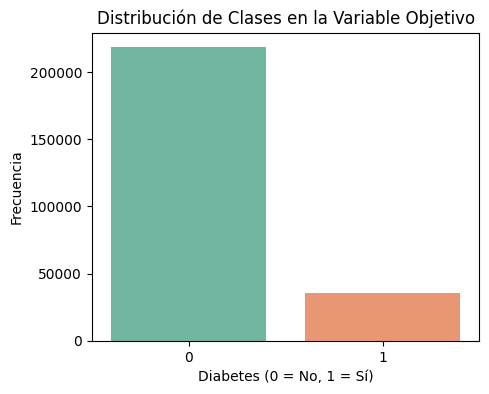

Diabetes_binary
0    0.860667
1    0.139333
Name: proportion, dtype: float64


In [ ]:
# Ver distribución de la variable objetivo
plt.figure(figsize=(5,4))
sns.countplot(x=Y.Diabetes_binary, palette="Set2")
plt.title("Distribución de Clases en la Variable Objetivo")
plt.xlabel("Diabetes (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.show()

# Ver proporción de cada clase
print(Y.Diabetes_binary.value_counts(normalize=True))

### Identificación de outliers

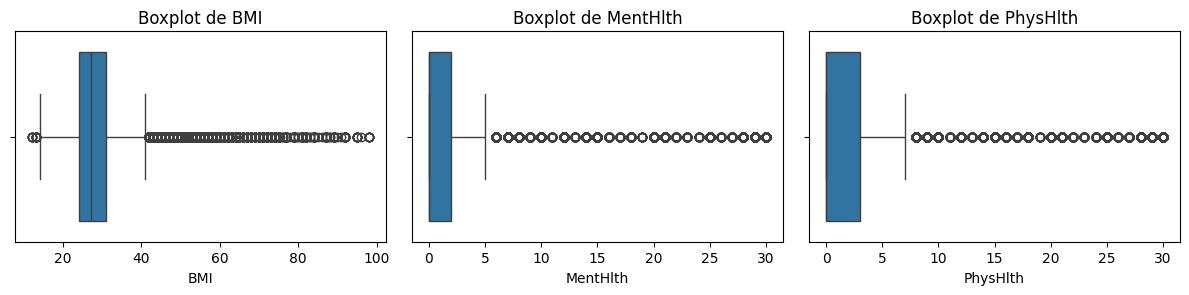

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=X[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

## 1.3. Tipo de datos

In [ ]:
data.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object

## 1.4. Análisis

### Análisis bivariado
Se realiza un tipo de estudio según el tipo de variable que sean:
* Numérica - numérica: **Spearman**.
* Numérica - categórica binaria: **Mann-Whitney U** (se muestra el p valor).
* Numérica - categórica (+3 categorías): **Kruskal-Wallis**.
* Categórica - categórica: **Cramer's V**.

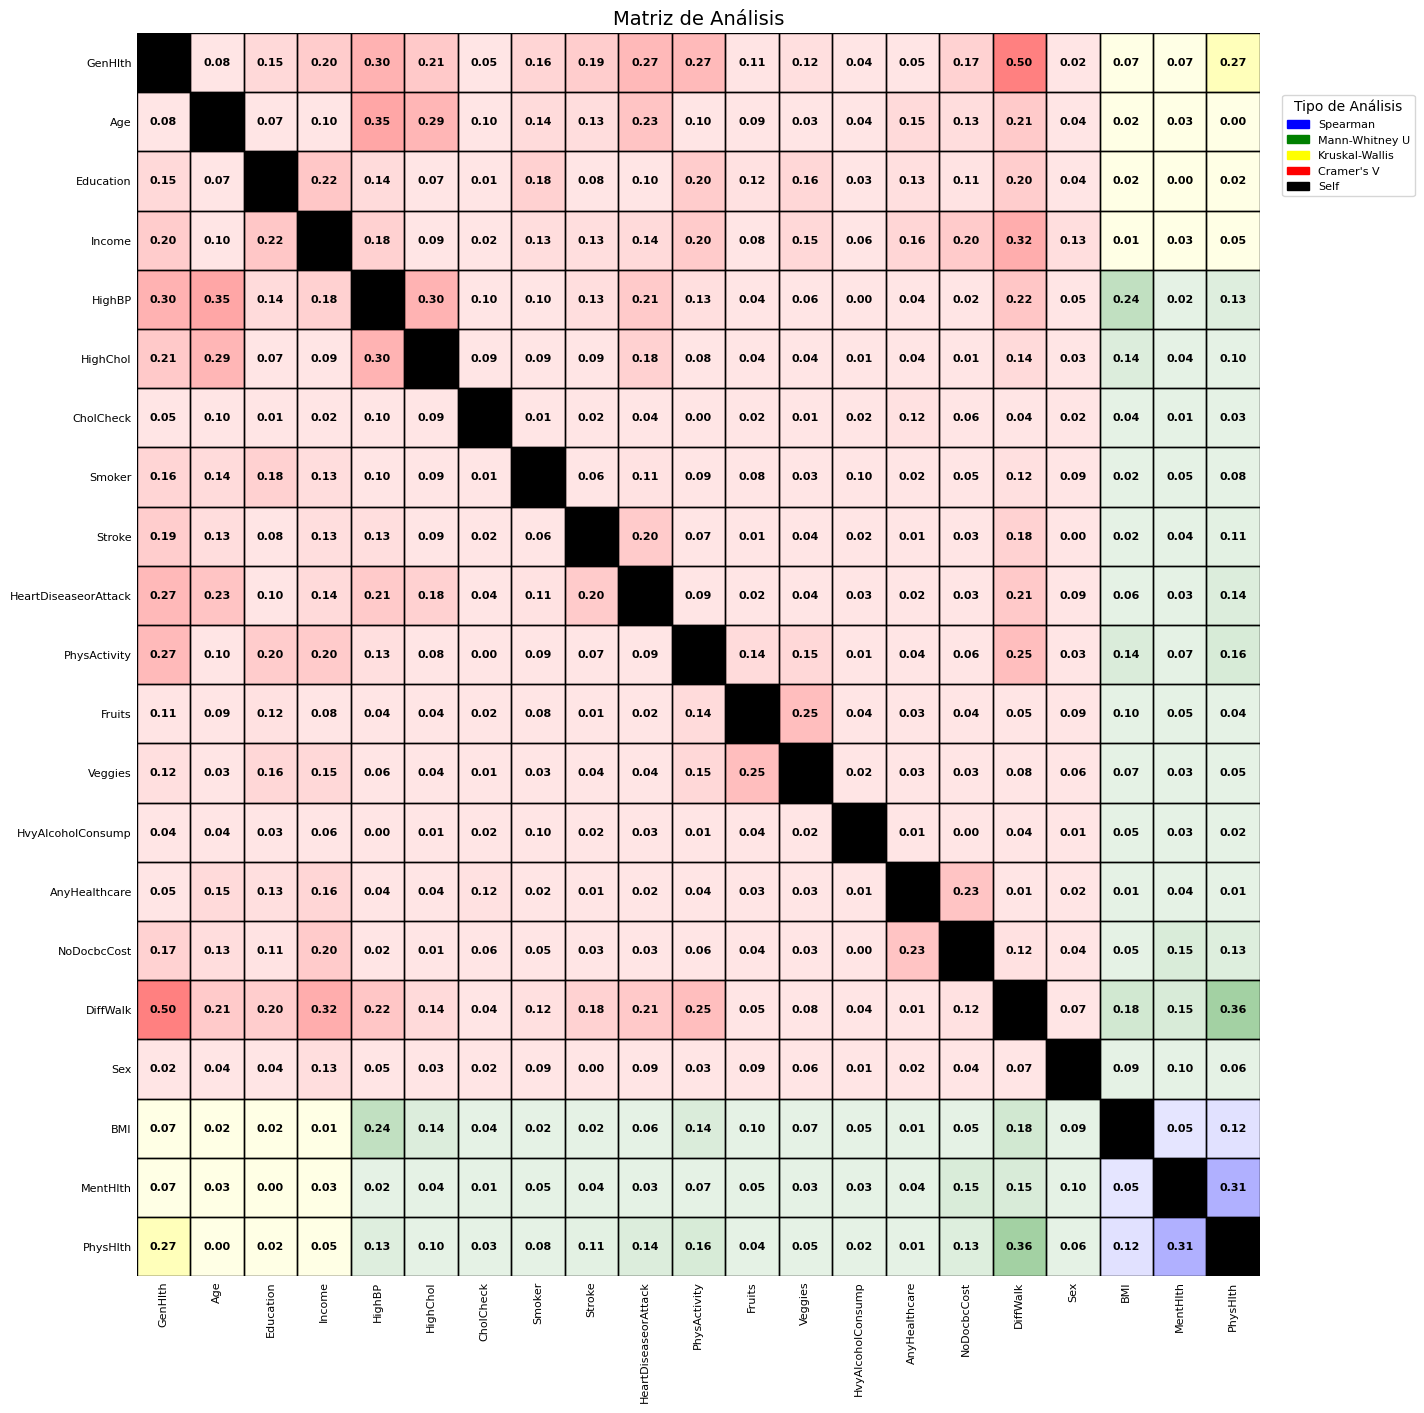

In [ ]:
# Diccionarios para identificación rápida de variables
categorical_vars = set(categorical_nonbinary_columns + categorical_binary_columns)
binary_vars = set(categorical_binary_columns)

def calculate_metric(x, y, x_is_categorical, y_is_categorical, x_is_binary, y_is_binary):
    if not x_is_categorical and not y_is_categorical:
        # Ambas variables son numéricas: uso de correlación de Spearman
        metric, p_value = spearmanr(x, y)
        analysis_type = 'Spearman'
    elif not x_is_categorical and y_is_categorical:
        # x numérica y y categórica
        if y_is_binary:
            # Caso binario: Mann-Whitney U con cálculo del efecto (r = |z|/sqrt(n1+n2))
            group1 = x[y == 0]
            group2 = x[y == 1]
            n1, n2 = len(group1), len(group2)
            try:
                U, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
                U_mean = n1 * n2 / 2.0
                sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12.0)
                z = (U - U_mean) / sigma_U
                metric = abs(z) / np.sqrt(n1 + n2)
            except ValueError:
                metric, p_value = 0, 1.0
            analysis_type = 'Mann-Whitney U'
        else:
            # y categórica con más de 2 niveles: uso de Kruskal-Wallis y cálculo del efecto (eta²)
            groups = [x[y == cat] for cat in np.unique(y)]
            k = len(groups)
            n = len(x)
            if k > 1 and all(len(g) > 1 for g in groups):
                stat, p_value = kruskal(*groups)
                # Efecto estimado: eta² = (H - k + 1) / (n - k)
                metric = max(0, (stat - (k - 1)) / (n - k))
            else:
                metric, p_value = 0, 1.0
            analysis_type = 'Kruskal-Wallis'
    elif x_is_categorical and not y_is_categorical:
        # x categórica y y numérica (caso análogo)
        if x_is_binary:
            group1 = y[x == 0]
            group2 = y[x == 1]
            n1, n2 = len(group1), len(group2)
            try:
                U, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
                U_mean = n1 * n2 / 2.0
                sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12.0)
                z = (U - U_mean) / sigma_U
                metric = abs(z) / np.sqrt(n1 + n2)
            except ValueError:
                metric, p_value = 0, 1.0
            analysis_type = 'Mann-Whitney U'
        else:
            groups = [y[x == cat] for cat in np.unique(x)]
            k = len(groups)
            n = len(y)
            if k > 1 and all(len(g) > 1 for g in groups):
                stat, p_value = kruskal(*groups)
                metric = max(0, (stat - (k - 1)) / (n - k))
            else:
                metric, p_value = 0, 1.0
            analysis_type = 'Kruskal-Wallis'
    else:
        # Ambas variables categóricas: uso de la prueba chi-cuadrado y cálculo de Cramer's V
        contingency_table = pd.crosstab(x, y)
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        n_total = contingency_table.values.sum()
        phi2 = chi2 / n_total
        r, k = contingency_table.shape
        try:
            metric = np.sqrt(phi2 / min((k - 1), (r - 1)))
        except ZeroDivisionError:
            metric = 0
        analysis_type = "Cramer's V"
    return metric, p_value, analysis_type

def create_metric_matrix(X, categorical_nonbinary_columns, categorical_binary_columns, numerical_columns):
    all_columns = categorical_nonbinary_columns + categorical_binary_columns + numerical_columns
    n = len(all_columns)
    metric_matrix = np.zeros((n, n))
    analysis_matrix = [[None] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            if i == j:
                metric_matrix[i, j] = 1.0
                analysis_matrix[i][j] = 'Self'
            else:
                x = X[all_columns[i]]
                y = X[all_columns[j]]
                x_is_categorical = all_columns[i] in categorical_vars
                y_is_categorical = all_columns[j] in categorical_vars
                x_is_binary = all_columns[i] in binary_vars
                y_is_binary = all_columns[j] in binary_vars
                metric, p_value, analysis_type = calculate_metric(
                    x, y,
                    x_is_categorical, y_is_categorical,
                    x_is_binary, y_is_binary
                )
                metric_matrix[i, j] = metric
                analysis_matrix[i][j] = analysis_type

    metric_df = pd.DataFrame(metric_matrix, index=all_columns, columns=all_columns)
    analysis_df = pd.DataFrame(analysis_matrix, index=all_columns, columns=all_columns)
    return metric_df, analysis_df

# Generar la matriz de análisis
metric_df, analysis_df = create_metric_matrix(
    X,
    categorical_nonbinary_columns,
    categorical_binary_columns,
    numerical_columns
)

# Definir colores para cada tipo de análisis
analysis_colors = {
    "Spearman": "blue",
    "Mann-Whitney U": "green",
    "Kruskal-Wallis": "yellow",
    "Cramer's V": "red",
    "Self": "black"
}

# Graficar la matriz de análisis
fig, ax = plt.subplots(figsize=(18, 14))
for i in range(metric_df.shape[0]):
    for j in range(metric_df.shape[1]):
        value = metric_df.iloc[i, j]
        analysis_type = analysis_df.iloc[i, j]
        color = analysis_colors.get(analysis_type, "white")
        alpha = max(0.1, min(abs(value), 1))  # transparencia en rango [0.1, 1]
        rgba_color = to_rgba(color, alpha)
        rect = plt.Rectangle((j, i), 1, 1, color=rgba_color, ec='black')
        ax.add_patch(rect)
        ax.text(j + 0.5, i + 0.5, '<0.001' if value < 0.001 else f'{value:.2f}',
                ha='center', va='center', fontsize=8, fontweight='bold')

ax.set_xlim(0, metric_df.shape[1])
ax.set_ylim(0, metric_df.shape[0])
ax.invert_yaxis()
ax.set_xticks(np.arange(metric_df.shape[1]) + 0.5)
ax.set_yticks(np.arange(metric_df.shape[0]) + 0.5)
ax.set_xticklabels(metric_df.columns, rotation=90, fontsize=8)
ax.set_yticklabels(metric_df.index, fontsize=8)
ax.tick_params(axis='both', which='both', length=0)
for spine in ax.spines.values():
    spine.set_visible(False)

# Leyenda
legend_patches = [mpatches.Patch(color=color, label=label)
                  for label, color in analysis_colors.items()]
ax.legend(handles=legend_patches, loc='upper left',
          bbox_to_anchor=(1.02, 0.95), borderaxespad=0.0,
          title="Tipo de Análisis", fontsize=8)
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.title("Matriz de Análisis", fontsize=14)
plt.show()

Para Correlación de Spearman 🔵:
* r < 0.10: Correlación despreciable o nula
* 0.10 ≤ r < 0.30: Correlación pequeña o débil
* 0.30 ≤ r < 0.50: Correlación moderada
* 0.50 ≤ r < 0.70: Correlación alta o fuerte
* r ≥ 0.70: Correlación muy fuerte

Para el Tamaño del Efecto derivado de la prueba de Mann-Whitney U 🟢(calculado como * r = |z|/√(n₁+n₂)):
* r ≈ 0.10: Efecto pequeño
* r ≈ 0.30: Efecto moderado
* r ≈ 0.50: Efecto grande

Para la medida de efecto derivada de la prueba de Kruskal-Wallis 🟡(usando eta²):
* 0.01 ≤ η² < 0.06: Efecto pequeño
* 0.06 ≤ η² < 0.14: Efecto moderado
* η² ≥ 0.14: Efecto grande

Para Cramer's V 🔴(utilizado en variables categóricas):
* V < 0.10: Asociación despreciable
* 0.10 ≤ V < 0.30: Asociación débil
* 0.30 ≤ V < 0.50: Asociación moderada
* V ≥ 0.50: Asociación fuerte

Fuente:
Cohen, J. (1988). Statistical Power Analysis for the Behavioral Sciences (2ª ed.). Lawrence Erlbaum Associates.

### Information Gain
obtenido de: https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

Funciona bien con datos categóricos, ordinales y binarios y captura relaciones no lineales.

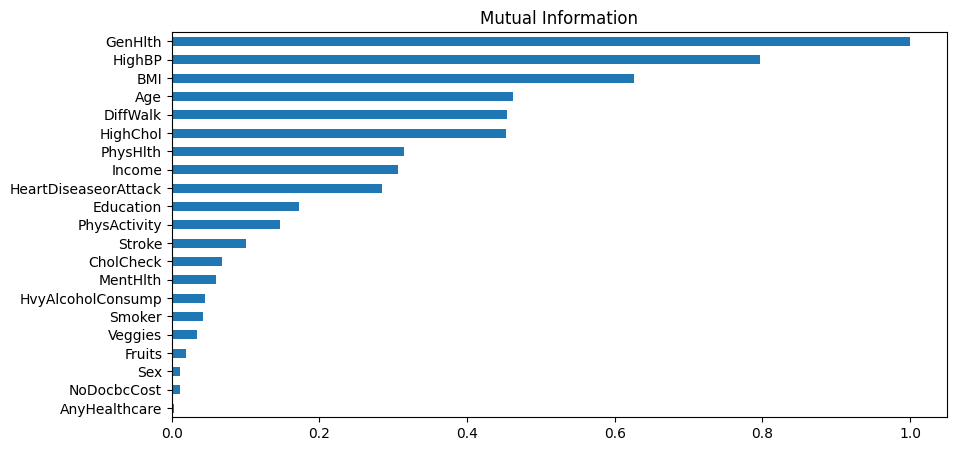

In [ ]:
# Calcular la información mutua
importances = mutual_info_classif(X, Y.Diabetes_binary, discrete_features=True, random_state=42)

# Crear un DataFrame con las importancias de las características
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Normalizar las importancias para comparación
feat_importances /= feat_importances.max()

# Visualizar las importancias de las características
plt.figure(figsize=(10, 5))
feat_importances.sort_values().plot(kind='barh')
plt.title('Mutual Information')
plt.show()

puede ser que el desbalance de las clases afecte a los resultados??

a continuacion:

✅ Se balancea primero el target con SMOTE para evitar que la información mutua esté sesgada hacia la clase mayoritaria.

✅ En lugar de balancear cada característica individualmente, se realiza un submuestreo general para mantener la estructura de correlación entre variables.

✅ Se compara la información mutua antes y después del balanceo para evaluar posibles efectos artificiales introducidos por SMOTE.

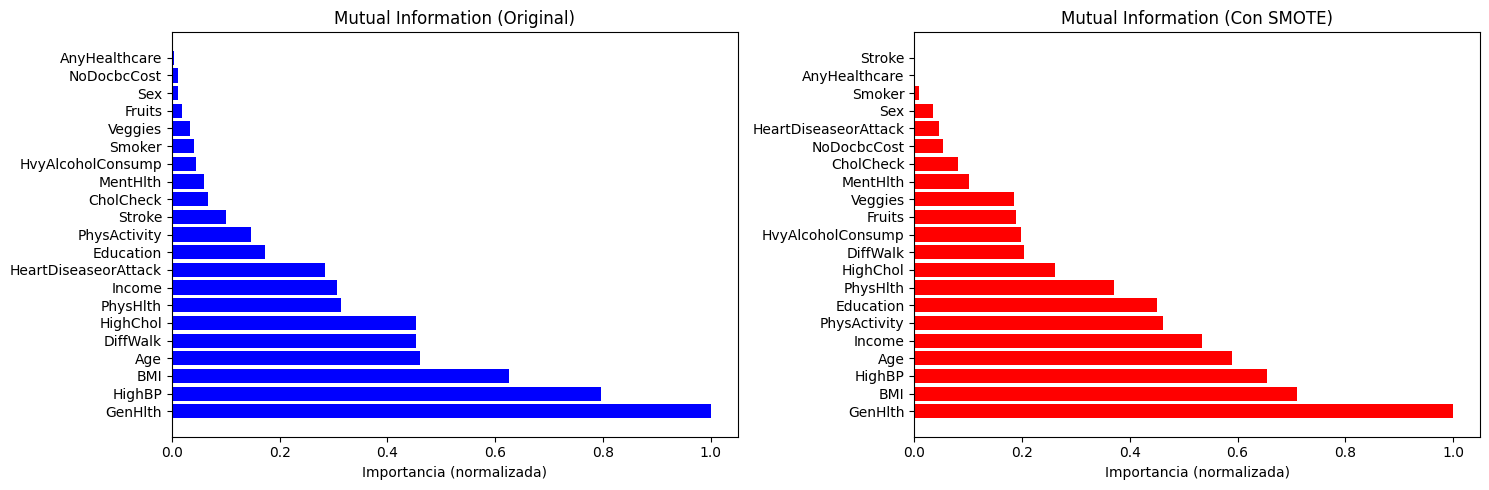

                      Original         SMOTE
Age                   0.461564  5.900373e-01
AnyHealthcare         0.003162  8.047045e-04
BMI                   0.626574  7.093766e-01
CholCheck             0.067869  8.013525e-02
DiffWalk              0.453632  2.035805e-01
Education             0.172791  4.501395e-01
Fruits                0.018651  1.884417e-01
GenHlth               1.000000  1.000000e+00
HeartDiseaseorAttack  0.284593  4.527577e-02
HighBP                0.796362  6.540194e-01
HighChol              0.453215  2.610833e-01
HvyAlcoholConsump     0.045374  1.987966e-01
Income                0.306589  5.338270e-01
MentHlth              0.059504  1.009023e-01
NoDocbcCost           0.010589  5.318546e-02
PhysActivity          0.146907  4.614863e-01
PhysHlth              0.314847  3.710049e-01
Sex                   0.011188  3.471081e-02
Smoker                0.041767  8.438318e-03
Stroke                0.100518  3.771327e-07
Veggies               0.034455  1.848042e-01


In [ ]:
# 1️⃣ Aplicar SMOTE para balancear el target antes del cálculo de MI
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, Y.Diabetes_binary)

# 2️⃣ Definir función para calcular información mutua sin modificar cada variable individualmente
def calculate_mutual_info(X, y, random_state=42):
    """
    Calcula la información mutua entre cada variable en X y el target y sin modificar las variables individualmente.
    """
    return mutual_info_classif(X, y, discrete_features=True, random_state=random_state)

# 3️⃣ Calcular información mutua en el dataset original (sin balancear)
mi_original = calculate_mutual_info(X, Y.Diabetes_binary)

# 4️⃣ Calcular información mutua en el dataset balanceado con SMOTE
mi_smote = calculate_mutual_info(X_smote, y_smote)

# 5️⃣ Crear DataFrames con los resultados
mi_series_original = pd.Series(mi_original, index=X.columns).sort_values(ascending=False)
mi_series_smote = pd.Series(mi_smote, index=X_smote.columns).sort_values(ascending=False)

# Normalizar ambas series para comparación
mi_series_original /= mi_series_original.max()
mi_series_smote /= mi_series_smote.max()

# 6️⃣ Visualización comparativa de Mutual Information antes y después de SMOTE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de Mutual Information en el dataset original
axes[0].barh(mi_series_original.index, mi_series_original, color="blue")
axes[0].set_title("Mutual Information (Original)")
axes[0].set_xlabel("Importancia (normalizada)")

# Gráfico de Mutual Information en el dataset balanceado con SMOTE
axes[1].barh(mi_series_smote.index, mi_series_smote, color="red")
axes[1].set_title("Mutual Information (Con SMOTE)")
axes[1].set_xlabel("Importancia (normalizada)")

plt.tight_layout()
plt.show()

# Comparar valores numéricamente
mi_comparison = pd.DataFrame({"Original": mi_series_original, "SMOTE": mi_series_smote})
print(mi_comparison)

### Correlación de pearson
No es la mejor opción dado que la mayoría de variables son categóricas.

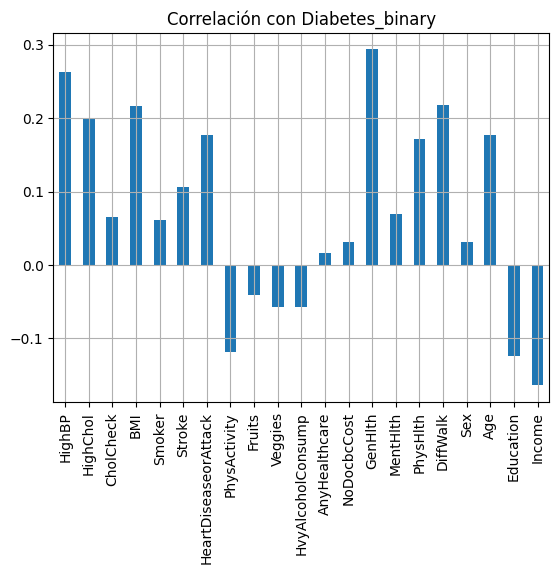

In [ ]:
X.corrwith(Y.Diabetes_binary).plot(kind='bar', grid=True, title="Correlación con Diabetes_binary");

## 1.5. Conclusiones
Eliminación de variables:
* Estas variables tienen información mutua extremadamente baja en ambos escenarios, lo que indica que no aportan valor predictivo al modelo.
 * **AnyHealthcare**
 * **Sex**
 * **Smoker**
 * **Stroke**
 * **NoDocbcCost**
* Estas variables están correlacionadas con otras.
 * **DiffWalk** (fuertemente correlacionado con GenHlth)
 * **PhysHlth** (fuertemente correlacionado con GenHlth)


// COMENTARIO DE CHATGPT //
📌 Análisis de Variables
1️⃣ Variables con MI baja en ambos casos (Candidatas a eliminación)

Variable	MI Original	MI SMOTE
AnyHealthcare	0.003162	0.000804

Sex	0.011188	0.034711

Smoker	0.041767	0.008438

Stroke	0.100518	0.0000003

NoDocbcCost	0.010589	0.053185


Estas variables tienen información mutua extremadamente baja en ambos escenarios, lo que indica que no aportan valor predictivo al modelo.
Se recomienda eliminarlas.

2️⃣ Variables con un aumento drástico tras SMOTE (Posibles Sesgos)

Variable	MI Original	MI SMOTE	Aumento (%)

Fruits	0.018651	0.188442	🔺 +909%

Veggies	0.034455	0.184804	🔺 +436%

HvyAlcoholConsump	0.045374	0.198796	🔺 +338%

Si el modelo final va a ser entrenado con datos desbalanceados (sin SMOTE en el entrenamiento), estas variables deben eliminarse porque su alta MI después de SMOTE no refleja una verdadera relación con la variable objetivo.

Si SMOTE se aplicará en el entrenamiento del modelo, podríamos dejarlas y validar su impacto en el rendimiento final.

⚠ Recomendación:

🔸 Si queremos evitar cualquier sesgo, eliminarlas.

🔸 Si queremos probar su efecto, hacer dos versiones del modelo (con y sin ellas) y comparar.


3️⃣ Variables con reducción drástica tras SMOTE (Candidatas a eliminación)

Variable	MI Original	MI SMOTE	Reducción (%)

DiffWalk	0.453632	0.203580	🔻 -55%

HeartDiseaseorAttack	0.284593	0.045276	🔻 -84%

HighChol	0.453215	0.261083	🔻 -42%

HeartDiseaseorAttack pierde casi toda su relación con la variable objetivo tras SMOTE, por lo que su influencia inicial era probablemente un efecto del desbalanceo.

Recomendamos eliminarla.

DiffWalk y HighChol aún mantienen cierta relevancia tras SMOTE, por lo que podríamos conservarlas.

In [8]:
# variables definitivas
# Definir las variables a eliminar
deleted_vars = [
    "AnyHealthcare",
    "Sex",
    "NoDocbcCost",
    "Smoker",
    "Stroke",
    "PhysHlth",
    "DiffWalk",
]

# Crear las nuevas X e Y
X_filtered = X.drop(columns=deleted_vars)
Y_filtered = Y.copy()  # No modificamos la variable objetivo

# Actualizar las listas de variables después de la eliminación
numerical_columns_filtered = [col for col in numerical_columns if col not in deleted_vars]
categorical_columns_filtered = [col for col in categorical_columns if col not in deleted_vars]
categorical_nonbinary_columns_filtered = [col for col in categorical_nonbinary_columns if col not in deleted_vars]
categorical_binary_columns_filtered = [col for col in categorical_binary_columns if col not in deleted_vars]

# Imprimir las nuevas listas de variables
print("Variables numéricas:", numerical_columns_filtered)
print("Variables categóricas:", categorical_columns_filtered)
print("Variables categóricas no binarias:", categorical_nonbinary_columns_filtered)
print("Variables categóricas binarias:", categorical_binary_columns_filtered)


Variables numéricas: ['BMI', 'MentHlth']
Variables categóricas: ['HighBP', 'HighChol', 'CholCheck', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'Age', 'Education', 'Income']
Variables categóricas no binarias: ['GenHlth', 'Age', 'Education', 'Income']
Variables categóricas binarias: ['HighBP', 'HighChol', 'CholCheck', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']


# 2. Preprocesamiento


## Tratamiento de Outliers y categorización (BMI)
Segun ([fuente](https://www.nhs.uk/conditions/obesity/)):
* Underweight: Below 18.5
* Normal weight: 18.5–24.9
* Pre-obesity: 25.0–29.9
* Obesity class I: 30.0–34.9
* Obesity class II: 35.0–39.9
* Obesity class III: Above 40


Como físicamente creemos que es posible tener un BMI mucho mayor que 40 (p.ej. teniendo una baja estatura y un peso muy elevado), concluimos que vamos a categorizar la variable y no eliminar ninguna fila del dataset.

In [ ]:
# Definir los intervalos y etiquetas de clasificación de BMI
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]  # np.inf representa valores mayores a 40
bmi_labels = ["Underweight", "Normal weight", "Pre-obesity", "Obesity class I", "Obesity class II", "Obesity class III"]

# Crear una nueva columna categórica para BMI
X_filtered["BMI"] = pd.cut(X_filtered["BMI"], bins=bmi_bins, labels=bmi_labels, right=True).cat.codes.astype("int64")

# Actualizar las listas de variables categóricas y numéricas
categorical_columns_filtered.append("BMI")
categorical_nonbinary_columns_filtered.append("BMI")  # Ahora es categórica con más de 2 niveles

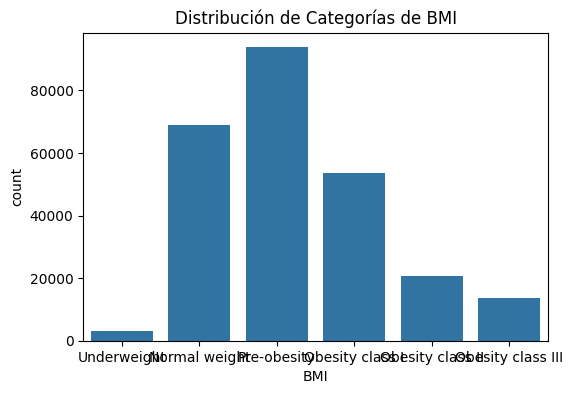

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=X_filtered['BMI'])
plt.title("Distribución de Categorías de BMI")
plt.show()

## Train-test split

In [9]:
# División en 80% train - 20% test con estratificación del target
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, Y_filtered, test_size=0.2, random_state=42, stratify=Y_filtered
)

# Verificar tamaños de los conjuntos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Distribución del target en entrenamiento:\n", y_train.value_counts(normalize=True))
print("Distribución del target en prueba:\n", y_test.value_counts(normalize=True))


Tamaño de X_train: (202944, 14)
Tamaño de X_test: (50736, 14)
Distribución del target en entrenamiento:
 Diabetes_binary
0                  0.860666
1                  0.139334
Name: proportion, dtype: float64
Distribución del target en prueba:
 Diabetes_binary
0                  0.860671
1                  0.139329
Name: proportion, dtype: float64


# 3. Implementación de modelo trivial

In [10]:
# Definir el DummyClassifier que siempre predice la clase mayoritaria
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
dummy_clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_dummy = dummy_clf.predict(X_test)

# Calcular AUC como métrica principal
auc_dummy = roc_auc_score(y_test, y_pred_dummy)

# Validación cruzada (10-Fold CV) para ver estabilidad
cv_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring="roc_auc")

# Mostrar resultados
print(f"AUC DummyClassifier (Test Set): {auc_dummy:.4f}")
print(f"AUC DummyClassifier (Cross-Validation Mean): {cv_scores.mean():.4f}")
print(f"AUC DummyClassifier (Cross-Validation Std Dev): {cv_scores.std():.4f}")


AUC DummyClassifier (Test Set): 0.5000
AUC DummyClassifier (Cross-Validation Mean): 0.5000
AUC DummyClassifier (Cross-Validation Std Dev): 0.0000


# 4. Implementación de modelos predictivos
* para encontrar los mejores parametros: GridSearchCV, RandomizedSearchCV o Bayesian Optimization
* posteriormente se puede utilizar SHAP para que seleccione automaticamente las variables y comprobar la seleccion que hicimos.

## RandomForestClassifier
Modelo base fuerte, maneja datos categóricos sin problemas y es robusto.

* **n_estimators** (cantidad de árboles): 100 es un buen punto de partida, pero Random Forest suele mejorar hasta ~300-500 árboles antes de volverse ineficiente.
Valores mayores a 500 no suelen mejorar el rendimiento significativamente en datasets medianos/grandes. (Breiman, L. (2001). Random Forests en Machine Learning Journal.)
* **max_depth** (profundidad máxima del árbol): None permite que el árbol crezca completamente (puede sobreajustar).
Valores pequeños (10-20) controlan el overfitting y mejoran la capacidad de generalización.
Más de 30 generalmente es innecesario, ya que la mayoría de los datasets no requieren árboles tan profundos. (Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning.)
* **min_samples_split** (Mínimo de muestras para dividir un nodo): Valores bajos (2-5) permiten que el árbol crezca más profundo y capture más patrones.
Valores más altos (10+) reducen la profundidad del árbol y evitan el sobreajuste. (Scikit-learn documentation: Empirical Studies on Decision Trees.)
* **min_samples_leaf** (Mínimo de muestras en las hojas finales): 1 es el valor predeterminado y permite capturar patrones raros.
2 o 4 evitan ramas muy específicas y reducen el sobreajuste. (Breiman, L. (2001). Random Forests.)
* **max_features** (Número de características consideradas en cada split): sqrt (raíz cuadrada del número total de features) es la configuración estándar en Random Forest.
log2 (logaritmo en base 2 del número total de features) reduce aún más la correlación entre árboles, lo cual puede mejorar estabilidad. (Ho, Tin Kam (1998). Random Decision Forests.)
* **bootstrap** (Uso de muestreo con reemplazo). True (predeterminado) → Cada árbol se entrena con un subconjunto aleatorio del dataset.
False (Sin reemplazo) → Cada árbol usa TODO el dataset. (Breiman, L. (2001). Bagging Predictors.)

SOLO SE VAN A UTILIZAR LOS PARAM QUE NO ESTAN COMENTADOS EN EL CODIGO, POR EXCESO DE TIEMPO DE COMPUTO

In [12]:
# 1️⃣ Definir el modelo base con `class_weight="balanced"`
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# 2️⃣ Definir hiperparámetros a optimizar (ajustados para mejorar AUC)
param_dist = {
    #'n_estimators': [100, 200, 300, 400, 500],  # Número de árboles
    #'max_depth': [None, 10, 20, 30],  # Profundidad máxima (None = sin límite)
    #'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    #'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en hojas

    'n_estimators': [100, 200, 300],  # Suficiente cobertura sin ir a 500
    'max_depth': [None, 15, 25],      # Rango acotado
    'max_features': ['sqrt', 'log2'],  # Número de características consideradas en cada split
    #'boosting': [True, False]
}

# 3️⃣ Configurar búsqueda aleatoria con validación cruzada (10-CV)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20,  # Aumentamos a 30 combinaciones para mayor precisión
    scoring="roc_auc",  # Optimización basada en AUC
    cv=cv, n_jobs=-1, verbose=2, random_state=42
)

# 4️⃣ Entrenar el modelo optimizado
random_search.fit(X_train, y_train)

# 5️⃣ Obtener el mejor modelo
best_rf = random_search.best_estimator_

# 6️⃣ Predicciones en test set
y_pred_rf = best_rf.predict(X_test)
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# 7️⃣ Evaluación del modelo optimizado
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 8️⃣ Mostrar Resultados
print(f"Mejores hiperparámetros: {random_search.best_params_}")
print(f"AUC (Test Set): {auc_rf:.4f}")
print(f"Accuracy: {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print("Matriz de Confusión:\n", conf_matrix)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mejores hiperparámetros: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 15}
AUC (Test Set): 0.8141
Accuracy: 0.7702
Precision: 0.3378
Recall: 0.6762
F1 Score: 0.4505
Matriz de Confusión:
 [[34295  9372]
 [ 2289  4780]]


Tras optimizar `RandomForestClassifier` usando validación cruzada de 10 particiones y búsqueda aleatoria de hiperparámetros, se obtuvo un AUC de 0.8141 en el conjunto de test. El modelo se configuró con class_weight='balanced' como alternativa al balanceo de clases, cumpliendo con los requisitos del proyecto.

Ahora que sabemos que los mejores hiperparámetros son {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 15}, podemos probar a entrenar directamente el modelo aumentando n_estimators.


In [13]:
# Usar los mejores hiperparámetros encontrados y aumentar n_estimators
refined_rf = RandomForestClassifier(
    n_estimators=500,  # antes eran 300
    max_depth=15,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

refined_rf.fit(X_train, y_train)

# Evaluar
y_pred_refined = refined_rf.predict(X_test)
y_pred_prob_refined = refined_rf.predict_proba(X_test)[:, 1]

auc_refined = roc_auc_score(y_test, y_pred_prob_refined)
print(f"AUC (500 árboles): {auc_refined:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


AUC (500 árboles): 0.8143


la mejora no es significativa, nos quedaremos con n_estimators=300

y si probamos ahora a añadir manualmente dos atributos min_samples de forma arbitraria?

In [14]:
tuned_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
tuned_rf.fit(X_train, y_train)

# Evaluación
y_pred = tuned_rf.predict(X_test)
y_prob = tuned_rf.predict_proba(X_test)[:, 1]
print(f"AUC (ajuste fino de split/leaf): {roc_auc_score(y_test, y_prob):.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


AUC (ajuste fino de split/leaf): 0.8172


sí mejoró el modelo (y eso que fue arbitrario). probaremos a hacer un RandomizedSearchCV con estos dos parametros y los mejores hiperparametros que ya encontramos anteriormente.

In [15]:
# 1️⃣ Modelo base con hiperparámetros óptimos previos (fijos)
rf_fixed = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# 2️⃣ Espacio de búsqueda para los parámetros finos
param_dist_min_samples = {
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# 3️⃣ Validación cruzada de 10 particiones
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 4️⃣ RandomizedSearchCV centrado solo en estos dos parámetros
random_search_min = RandomizedSearchCV(
    estimator=rf_fixed,
    param_distributions=param_dist_min_samples,
    n_iter=16,  # cubrir casi todas las combinaciones posibles (4x4 = 16)
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# 5️⃣ Entrenar el modelo optimizado
random_search_min.fit(X_train, y_train)

# 6️⃣ Obtener el mejor modelo resultante
best_rf_fine = random_search_min.best_estimator_

# 7️⃣ Evaluación del modelo sobre el conjunto de test
y_pred_rf_fine = best_rf_fine.predict(X_test)
y_pred_prob_rf_fine = best_rf_fine.predict_proba(X_test)[:, 1]

# 8️⃣ Cálculo de métricas finales
auc_fine = roc_auc_score(y_test, y_pred_prob_rf_fine)
acc_fine = accuracy_score(y_test, y_pred_rf_fine)
prec_fine = precision_score(y_test, y_pred_rf_fine)
recall_fine = recall_score(y_test, y_pred_rf_fine)
f1_fine = f1_score(y_test, y_pred_rf_fine)
conf_matrix_fine = confusion_matrix(y_test, y_pred_rf_fine)

# 9️⃣ Mostrar resultados
print(f"📌 Mejores hiperparámetros (ajuste fino): {random_search_min.best_params_}")
print(f"🔹 AUC (Test Set): {auc_fine:.4f}")
print(f"🔹 Accuracy: {acc_fine:.4f}")
print(f"🔹 Precision: {prec_fine:.4f}")
print(f"🔹 Recall: {recall_fine:.4f}")
print(f"🔹 F1 Score: {f1_fine:.4f}")
print("📊 Matriz de Confusión:\n", conf_matrix_fine)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


📌 Mejores hiperparámetros (ajuste fino): {'min_samples_split': 15, 'min_samples_leaf': 6}
🔹 AUC (Test Set): 0.8208
🔹 Accuracy: 0.7531
🔹 Precision: 0.3266
🔹 Recall: 0.7271
🔹 F1 Score: 0.4507
📊 Matriz de Confusión:
 [[33069 10598]
 [ 1929  5140]]


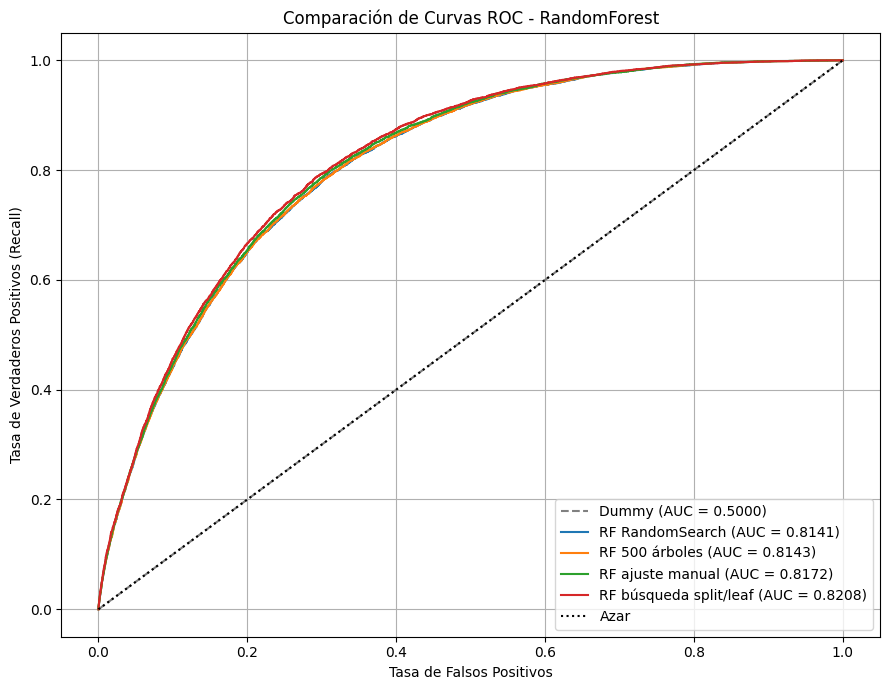

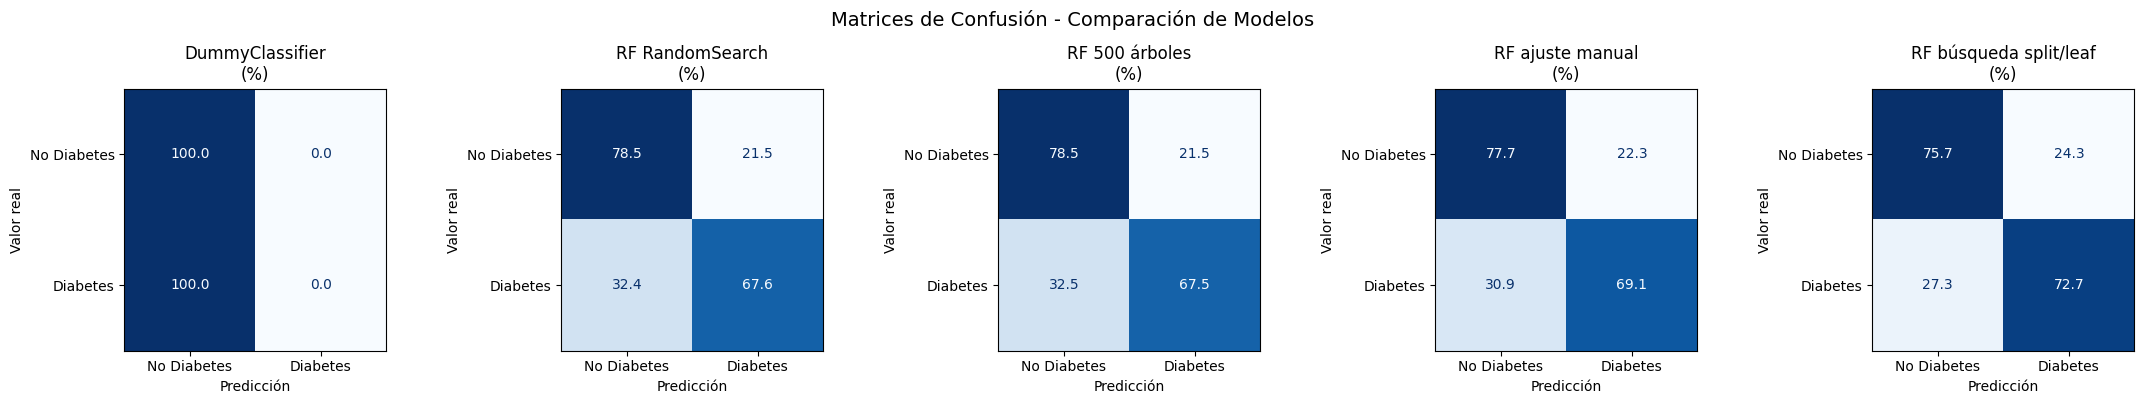

In [20]:
# 1️⃣ Calcular curvas ROC
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_refined, tpr_refined, _ = roc_curve(y_test, y_pred_prob_refined)
roc_auc_refined = auc(fpr_refined, tpr_refined)

fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

fpr_fine, tpr_fine, _ = roc_curve(y_test, y_pred_prob_rf_fine)
roc_auc_fine = auc(fpr_fine, tpr_fine)

# 2️⃣ Graficar curvas ROC
plt.figure(figsize=(9, 7))
plt.plot(fpr_dummy, tpr_dummy, label=f'Dummy (AUC = {roc_auc_dummy:.4f})', color='gray', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'RF RandomSearch (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_refined, tpr_refined, label=f'RF 500 árboles (AUC = {roc_auc_refined:.4f})')
plt.plot(fpr_tuned, tpr_tuned, label=f'RF ajuste manual (AUC = {roc_auc_tuned:.4f})')
plt.plot(fpr_fine, tpr_fine, label=f'RF búsqueda split/leaf (AUC = {roc_auc_fine:.4f})')

plt.plot([0, 1], [0, 1], color='black', linestyle=':', label='Azar')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos (Recall)')
plt.title('Comparación de Curvas ROC - RandomForest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3️⃣ Mostrar matrices de confusión
model_labels = [
    "DummyClassifier",
    "RF RandomSearch",
    "RF 500 árboles",
    "RF ajuste manual",
    "RF búsqueda split/leaf"
]

matrices = [
    confusion_matrix(y_test, y_pred_dummy),
    confusion_matrix(y_test, y_pred_rf),
    confusion_matrix(y_test, y_pred_refined),
    confusion_matrix(y_test, y_pred),
    confusion_matrix(y_test, y_pred_rf_fine)
]

# Normalizar por fila (porcentaje sobre la clase real)
matrices_pct = [100 * matrix.astype('float') / matrix.sum(axis=1, keepdims=True) for matrix in matrices]

fig, axes = plt.subplots(1, 5, figsize=(22, 4))
for ax, matrix, label in zip(axes, matrices_pct, model_labels):
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                   display_labels=["No Diabetes", "Diabetes"])
    disp.plot(ax=ax, cmap="Blues", colorbar=False, values_format=".1f")
    ax.set_title(label + "\n(%)")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Valor real")

plt.suptitle("Matrices de Confusión - Comparación de Modelos", fontsize=14)
plt.tight_layout()
plt.show()

Se realizó una búsqueda específica sobre los parámetros min_samples_split y min_samples_leaf, manteniendo fijos los hiperparámetros principales obtenidos previamente (n_estimators=300, max_depth=15, max_features='sqrt'). Esta búsqueda permitió controlar la complejidad de los árboles, evaluando 16 combinaciones en una validación cruzada de 10 particiones.



---
Nota

---

Aunque no se ha implementado validación cruzada anidada (nested cross-validation) debido a su alto coste computacional, se ha utilizado una combinación de validación cruzada estratificada de 10 particiones y conjunto de test externo para garantizar una evaluación robusta del modelo, tal como se exige en la práctica. Esta estrategia ofrece una estimación fiable del rendimiento sin requerir los recursos computacionales adicionales que implicaría la anidación.

### Conclusiones
En esta sección se ha desarrollado un proceso completo de entrenamiento, ajuste fino y evaluación del modelo RandomForestClassifier, cumpliendo en todo momento con los requisitos establecidos por la práctica.

Se comenzó utilizando RandomizedSearchCV con validación cruzada estratificada de 10 particiones para ajustar los principales hiperparámetros del modelo (n_estimators, max_depth, max_features), obteniendo un modelo base con un AUC de 0.8141 en el conjunto de test.

A continuación, se aplicaron mejoras progresivas:

El aumento de árboles a n_estimators=500 produjo una mejora mínima (AUC = 0.8143), por lo que se mantuvo el valor óptimo de 300 árboles.
Se añadió un ajuste manual de los parámetros min_samples_split y min_samples_leaf, lo que mejoró el rendimiento hasta AUC = 0.8172.
Finalmente, se realizó una búsqueda enfocada exclusivamente en estos dos hiperparámetros, obteniendo como mejor combinación min_samples_split=15 y min_samples_leaf=6, con lo cual se alcanzó el mejor rendimiento global: **AUC = 0.8208 y Recall = 72.7%**.
Las visualizaciones de curvas ROC y matrices de confusión (normalizadas en porcentaje) muestran cómo los sucesivos ajustes permitieron incrementar la capacidad del modelo para detectar correctamente a los pacientes con diabetes o prediabetes, a costa de un ligero aumento en falsos positivos. Esta decisión es adecuada en un contexto clínico, donde minimizar los falsos negativos es prioritario.

Por tanto, RandomForestClassifier queda como un modelo altamente competitivo dentro del proyecto, y será tomado como referencia para comparar con los siguientes algoritmos de ensamblado.

## LightGBM
Más rápido y eficiente que GradientBoostingClassifier, ideal para datasets grandes.

In [ ]:
# 1️⃣ Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 2️⃣ Definir el modelo base
lgbm = LGBMClassifier(random_state=42, n_jobs=-1)

# 3️⃣ Definir el espacio de búsqueda
param_dist_lgbm = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 50]
}

# 4️⃣ Validación cruzada 10-CV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 5️⃣ Búsqueda aleatoria de hiperparámetros
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist_lgbm,
    n_iter=20,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# 6️⃣ Entrenar con los datos balanceados
random_search_lgbm.fit(X_train_bal, y_train_bal)

# 7️⃣ Evaluar el mejor modelo sobre X_test
best_lgbm = random_search_lgbm.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)
y_prob_lgbm = best_lgbm.predict_proba(X_test)[:, 1]

# 8️⃣ Métricas
auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
prec_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# 9️⃣ Resultados
print(f"📌 Mejores hiperparámetros LightGBM (SMOTE): {random_search_lgbm.best_params_}")
print(f"🔹 AUC (Test Set): {auc_lgbm:.4f}")
print(f"🔹 Accuracy: {acc_lgbm:.4f}")
print(f"🔹 Precision: {prec_lgbm:.4f}")
print(f"🔹 Recall: {recall_lgbm:.4f}")
print(f"🔹 F1 Score: {f1_lgbm:.4f}")
print("📊 Matriz de Confusión:\n", conf_matrix_lgbm)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


## XGBoost
Optimizado para boosting, excelente en datasets tabulares.

## CatBoost
Maneja mejor variables categóricas sin necesidad de preprocesamiento extra.

## Stacking Ensemble (Meta-Modelo)
En lugar de elegir un solo modelo, combinamos las predicciones de varios modelos para mejorar la generalización.
Entrenamos RandomForest, LightGBM, XGBoost, etc., y luego usamos un modelo final (meta-modelo) que toma sus predicciones como entrada.
Es más poderoso que simplemente seleccionar el mejor modelo individual.